In [5]:
cd ~

/Users/chowdahead


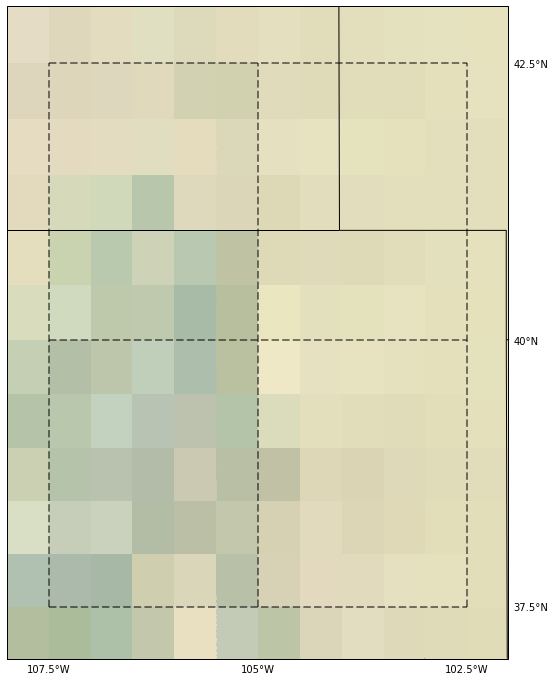

In [2]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def plotMap():    
    proj = ccrs.Mercator(central_longitude=180, min_latitude=15, 
    max_latitude=55)

    fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(12,12))

    ax.set_extent([-108 ,-102, 37, 43], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.LAND, facecolor='0.3')
    ax.add_feature(cfeature.LAKES, alpha=0.9)  
    ax.add_feature(cfeature.BORDERS, zorder=10)
    ax.add_feature(cfeature.COASTLINE, zorder=10)

    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m', facecolor='none')
    ax.add_feature(states_provinces, edgecolor='black', zorder=10)   

    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.ylabels_right=True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([-107.5, -105, -102.5])
    gl.ylocator = mticker.FixedLocator([37.5, 40, 42.5])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
    ax.stock_img()
    plt.show()
    
plotMap()

In [130]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import cartopy.crs as ccrs
from owslib.wmts import WebMapTileService


import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as feat
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from metpy.calc import get_wind_components, reduce_point_density
from metpy.plots import simple_layout, StationPlot, StationPlotLayout
from metpy.plots.wx_symbols import current_weather, sky_cover
from metpy.units import units
from datetime import datetime, timedelta

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



# Set the font 
font = {'family': 'fantasy',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }



def main(date_str):
    # URL of NASA GIBS
    URL = 'http://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
    wmts = WebMapTileService(URL)

    # Layers for MODIS true color and snow RGB
    layers = ['MODIS_Terra_SurfaceReflectance_Bands143'] # 'MODIS_Terra_CorrectedReflectance_Bands367'

    #date_str = '2018-02-05'

    # Plot setup
    plot_CRS = ccrs.Mercator()
    geodetic_CRS = ccrs.Geodetic()
    # CO lat/lon: -109, -102, 37, 41
    x0, y0 = plot_CRS.transform_point(-111., 34., geodetic_CRS)
    x1, y1 = plot_CRS.transform_point(-99., 46., geodetic_CRS)
    #x0, y0 = plot_CRS.transform_point(-108, 37, geodetic_CRS)
    #x1, y1 = plot_CRS.transform_point(-102, 43, geodetic_CRS)
    ysize = 8
    xsize = 2 * ysize * (x1 - x0) / (y1 - y0)
    fig = plt.figure(figsize=(10., 8.), dpi=100)
    #fig = plt.figure(figsize=(xsize, ysize), dpi=100)
    
    for layer, offset in zip(layers, [0, 0.5]):
        
        ax = plt.axes([offset, 0, 0.5, 1], projection=plot_CRS)
        #reader = shpreader.Reader('countyl010g_shp_nt00964/countyl010g.shp')

        #counties = list(reader.geometries())
        #COUNTIES = feat.ShapelyFeature(counties, ccrs.PlateCarree())
        state_boundaries = feat.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='110m', facecolor='none',
                                                   alpha=0.5)
    # Add some various map elements to the plot to make it recognizable
        ocean = feat.NaturalEarthFeature(category='physical', scale='50m', name='ocean', facecolor=feat.COLORS['water'])
        coast = feat.NaturalEarthFeature(category='physical', scale='50m', facecolor='none', name='coastline')
        state_borders = feat.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none',
                                                alpha=0.5) 
        land = feat.NaturalEarthFeature(category='physical', scale='50m', name='land', facecolor=feat.COLORS['land'])

        #ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')
        ax.add_feature(ocean, zorder=-1)
        ax.add_feature(land, zorder=-1)
        #ax.add_feature(state_borders, edgecolor='b',alpha=0.5)
        ax.add_feature(coast, edgecolor='black')
        ax.set_xlim((x0, x1))
        ax.set_ylim((y0, y1))
        #ax.add_wmts(wmts, layer, wmts_kwargs={'time': date_str})
        #txt = plt.text(-108.98, 37.03, wmts[layer].title, fontsize=18,
        #               color='wheat', transform=geodetic_CRS)#, transform=geodetic_CRS
        #txt.set_path_effects([PathEffects.withStroke(linewidth=5,
        #                                             foreground='black')])
        
        ax.scatter(-105, 42.5, marker='*', c="k",transform=geodetic_CRS,s=145) # Denver
        ax.scatter(-105, 37.5, marker='*', c="k",transform=geodetic_CRS,s=145) # Denver
        ax.scatter(-105, 40, marker='*', c="k",transform=geodetic_CRS,s=145) # Denver
        ax.scatter(-102.5, 40, marker='*', c="k",transform=geodetic_CRS,s=145) # Denver
        ax.scatter(-107.5, 40, marker='*', c="k",transform=geodetic_CRS,s=145) # Denver
        
        ax.scatter(-105, 35, marker='*', c="k",transform=geodetic_CRS,s=145) # Denver
        ax.scatter(-105, 45, marker='*', c="k",transform=geodetic_CRS,s=145) # Denver
        ax.scatter(-100, 40, marker='*', c="k",transform=geodetic_CRS,s=145) # Denver
        ax.scatter(-110, 40, marker='*', c="k",transform=geodetic_CRS,s=145) # Denver
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='r', alpha=0.5, linestyle='--', draw_labels=True)
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right=True
        gl.xlines = True
        gl.xlocator = mticker.FixedLocator([-111,-110,-107.5, -105, -102.5,-100,-99])
        gl.ylocator = mticker.FixedLocator([34,35,37.5, 40, 42.5,45,46])
        #gl.xlocator = mticker.FixedLocator([-108,-107.5, -105, -102.5,-102])
        #gl.ylocator = mticker.FixedLocator([37,37.5, 40, 42.5,43])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        transform = ccrs.PlateCarree()._as_mpl_transform(ax)
        ax.annotate('Z$_{Denver}$', xy=(-105.4, 39.6), xycoords=transform,color='k',fontsize=18,family='fantasy',
                   zorder=30)
        
        
        
        #ax.annotate('Z$_{north}$', xy=(-105.2, 42.7), xycoords=transform,color='k',fontsize=16,family='fantasy',
        #           weight='bold')
        #ax.annotate('Z$_{south}$', xy=(-105.2, 37.1), xycoords=transform,color='k',fontsize=16,family='fantasy',
        #           weight='bold')
        #ax.annotate('Z$_{east}$', xy=(-103, 40.2), xycoords=transform,color='k',fontsize=16,family='fantasy',
        #           weight='bold')
        #ax.annotate('Z$_{west}$', xy=(-108, 40.2), xycoords=transform,color='k',fontsize=16,family='fantasy',
        #           weight='bold')
        
        #ax.gridlines(color="k", linestyle="dotted",linewidth=2,alpha=0.5)
        
        
        ax.annotate('dx', xy=(-106.6, 40.05), xycoords=transform,color='k',fontsize=16,family='fantasy',
                   weight='bold')
        ax.annotate('dx', xy=(-103.9, 40.05), xycoords=transform,color='k',fontsize=16,family='fantasy',
                   weight='bold')
        ax.annotate('dy', xy=(-105.3, 41.05), xycoords=transform,color='k',fontsize=16,family='fantasy',
                    rotation=90,weight='bold')
        ax.annotate('dy', xy=(-105.3, 38.5), xycoords=transform,color='k',fontsize=16,family='fantasy',
                    rotation=90,weight='bold')
        #ax.gridlines(color="k", linestyle="dotted",linewidth=2,alpha=0.5)
            # Set the plot title    
    #plt.title("MODIS",loc='left',fontdict=font)
    #plt.title(date_str,loc='right',fontdict=font)
    plt.show()
    fig.savefig("/Users/chowdahead/Desktop/MSU_Dynamics/dx_dy_explaination_Vort.png",bbox_inches="tight")
    plt.close(fig)
#i=4
#for i in range(1,10):
#    if __name__ == '__main__':
#   
#        main('2018-05-0'+str(i))


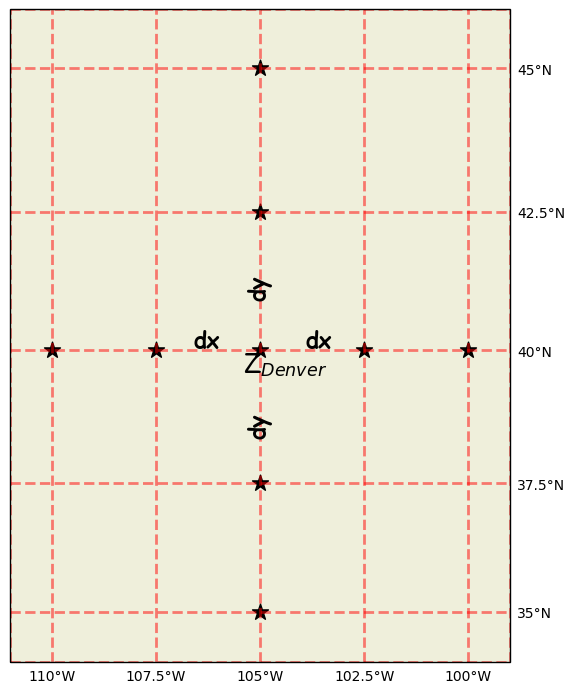

In [131]:
for i in range(24,25):
    if __name__ == '__main__':

        main('2019-03-'+str(i))
